In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Created the Environment
env=gym.make('CartPole-v1',render_mode='human')
env.reset()
env.render()

In [3]:
#Defining Stochastic Policy
def stoc_policy(x):
    tmp=np.random.rand()
    if(tmp<x[0]):
        return 0
    return 1

In [4]:
# Defining the x(s,a)
def x_func(s,a):
    t=np.zeros((2,4))
    if(a==0):
        t[0][0]=s[0]
        t[0][1]=s[1]
        t[0][2]=s[2]
        t[0][3]=s[3]
    else:
        t[1][0]=s[0]
        t[1][1]=s[1]
        t[1][2]=s[2]
        t[1][3]=s[3]
    return t

In [5]:
#Defining Soft Maxima function
def softmax(x):
    return (np.exp(x)/np.exp(x).sum())

In [6]:
def policy_func(s,theta):
    # theta -> 2X4 and s-> 1X4
    arr=np.dot(theta,s.T)
    arr=arr.T
    # arr is a 2X1 array
    # print(arr.shape)
    policy=softmax(arr)
    return policy

# Ans1 
### The expression of gradient is : 
$\nabla ln \pi(At/St, \theta) = x(s,a) - \sum_{b} \pi(b/St,\theta) x(s,b)$
### Where the matrix x(s,a) is defined as follows:

\[
\begin{pmatrix}
S_{1}.1_{a=a_1} & S_{2}.1_{a=a_1} S_{3}.1_{a=a_1} & S_{4}.1_{a=a_1} \\
S_{1}.1_{a=a_2} & S_{2}.1_{a=a_2} S_{3}.1_{a=a_2} & S_{4}.1_{a=a_2} \\
\end{pmatrix}
\]


In [7]:
def log_deloperator(policy,action,state):
    action=int(action)
    # print(action)
    other_action=(action+1)%2
    result= x_func(state,action)-(policy[action]*x_func(state,action)+policy[other_action]*x_func(state,other_action))
    return result

# Ans2 Implementing the reinforce algorithm with the algorithm parameters as:
$\gamma$ = 0.9 and $\alpha$=0.01


In [8]:
# Selecting the initial policy parameter , theta is a 2X4 array with random enteries b/w 0 and 1
theta=np.random.rand(2,4)
total_rewards=[]
# Choosing the hyperparameters i.e. gamma and alpha(step size)
gamma=0.9
alpha=0.01
policy=np.zeros((1,2))
at=np.zeros((1,500)) 
st=np.zeros((500,4))
for i in range(0,1000):
    policy=np.zeros((1,2))
    at=np.zeros((1,500)) 
    st=np.zeros((500,4))
    t=0
    if(i%100==0):
        print(i)
    s=env.reset()
    st[t]=s[0]
    # Episode Generation
    while(1):
        policy=policy_func(st[t],theta)
        # print(policy)
        at[0][t]=stoc_policy(policy)
        # print(at[0][t])
        s=env.step(int(at[0][t]))
        t=t+1
        st[t]=s[0]
        # s[2] is true when episode has ended
        if(s[2]):
            break
    #
    total_rewards.append((1-pow(gamma,t))/(1-gamma))
    #Updating theta
    for tx in range(0,t):
        return_estimate=(1-pow(gamma,t-tx))/(1-gamma)
        #theta update rule
        # Doubt the policy is a 2X1 array and the theta is a 2X4 array what to do
        theta=theta+alpha*pow(gamma,tx)*return_estimate*log_deloperator(policy,at[0][tx],st[tx])

print(total_rewards)

        



0
100
200
300
400
500
600
700
800
900
[9.418502629969602, 8.78423345409431, 8.905810108684879, 9.353891811077334, 7.941088679053511, 9.015229097816391, 8.78423345409431, 9.892247363356944, 8.649148282327008, 9.28210201230815, 9.880274848174382, 9.618479575523056, 9.892247363356944, 9.353891811077334, 9.47665236697264, 9.528987130275377, 9.817519963685994, 8.332281830033343, 6.513215599000001, 8.332281830033343, 9.353891811077334, 6.513215599000001, 9.817519963685994, 9.528987130275377, 9.948462247926802, 9.86697205352709, 9.418502629969602, 9.528987130275377, 9.948462247926802, 9.980033218889842, 9.852191170585655, 9.797244404095549, 9.28210201230815, 9.969567472778298, 9.797244404095549, 9.980033218889842, 9.994924712139438, 9.980033218889842, 9.835767967317397, 9.969567472778298, 9.57608841724784, 9.97781468765538, 9.998709929921832, 9.995889016832946, 9.90302262702125, 9.921448327887212, 8.78423345409431, 9.998033729495248, 9.97781468765538, 9.721871610556308, 9.972610725500468, 9.8

# Ans3 Plotting the training rewards after 1000 episodes.

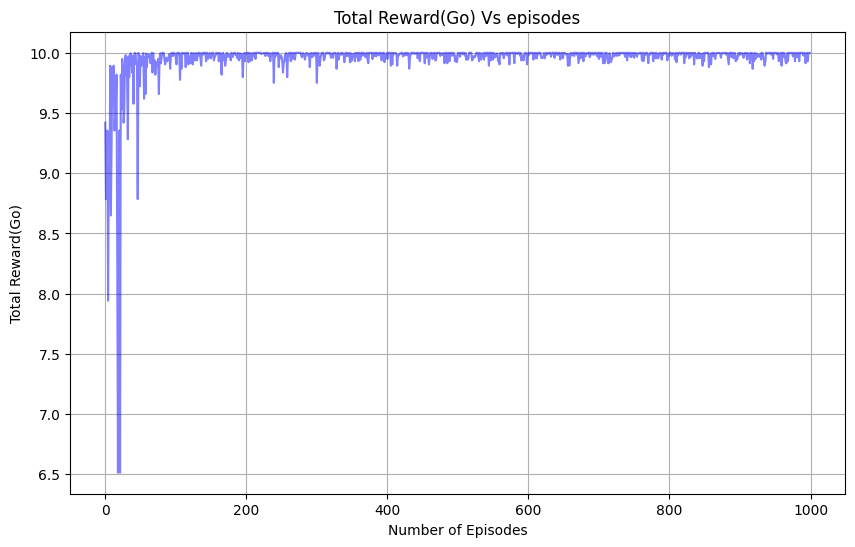

In [9]:
# Plotting training total rewards over 1000 episodes
episodes=range(len(total_rewards))
plt.figure(figsize=(10, 6))
plt.plot(episodes, total_rewards, c='blue', alpha=0.5)
plt.xlabel('Number of Episodes')
plt.ylabel('Total Reward(Go)')
plt.title('Total Reward(Go) Vs episodes')
plt.grid(True)
plt.show()

# Ans4
### Testing the policy obtained from the REINFORCE algoritm and finding the average reward for 5 episodes

In [10]:
#Testing the trained policy
reward=0
for i in range(0,5):
    tmp=0
    s=env.reset()
    while(1):
        policy=policy_func(s[0],theta)
        action=stoc_policy(policy)
        s=env.step(int(action))
        tmp=tmp+1
        if(s[2]):
            reward=(reward*(i+1)+tmp)/(i+2)
            break
    
print(f"The average reward is {reward}")
    

The average reward is 52.166666666666664


In [11]:
# v(s,w)=s1w1+s2w2+s3w3+s4w4
# del v(s,w) = [s1 s2 s3 s4]= s
def deloperator(s):
    return s

In [12]:
# defining action value function
# v(s,w)=s1w1+s2w2+s3w3+s4w4
# omega is 1X4 matrix and s is also 1X4 matrix
def action_value_func(s,omega):
    action_value=np.dot(omega,s.T)
    return action_value

# Ans 5
### Implementing the REINFORCE algorithm with baseline using the following hyperparameters.
$\gamma=0.9$ , 
$\alpha^\theta = 0.1$ and 
$\alpha^w = 0.1$

In [13]:
def reinforce_baseline():
    theta=np.random.rand(2,4)
    omega=np.random.rand(1,4)
    total_rewards_baseline=[]
    # Choosing the hyperparameters i.e. gamma and alpha(step size)
    gamma=0.9
    alpha1=0.01
    alpha2=0.01
    policy=np.zeros((1,2))
    at=np.zeros((1,500)) 
    st=np.zeros((500,4))
    for i in range(0,1000):
        policy=np.zeros((1,2))
        at=np.zeros((1,500)) 
        st=np.zeros((500,4))
        t=0
        if(i%100==0):
            print(i)
            # print(total_rewards_baseline)
        s=env.reset()
        st[t]=s[0]
        # Episode Generation
        while(1):
            policy=policy_func(st[t],theta)
            # print(policy)
            at[0][t]=stoc_policy(policy)
            # print(at[0][t])
            s=env.step(int(at[0][t]))
            t=t+1
            st[t]=s[0]
            # s[2] is true when episode has ended
            if(s[2]):
                break

        total_rewards_baseline.append((1-pow(gamma,t))/(1-gamma))
        #Updating theta
        for tx in range(0,t):
            return_estimate=(1-pow(gamma,t-tx))/(1-gamma)
            action_value=action_value_func(st[tx],omega)
            return_estimate_baseline=return_estimate-action_value
            #omega update rule
            omega=omega+alpha2*return_estimate_baseline*deloperator(st[tx])
            #theta update rule
            # Doubt the policy is a 2X1 array and the theta is a 2X4 array what to do
            theta=theta+alpha1*pow(gamma,tx)*return_estimate_baseline*log_deloperator(policy,at[0][tx],st[tx])

    return total_rewards_baseline

In [14]:
data=reinforce_baseline()
print(data)

0


100
200
300
400
500
600
700
800
900
[8.332281830033343, 6.861894039100001, 8.332281830033343, 8.649148282327008, 8.905810108684879, 8.14697981114816, 8.905810108684879, 8.78423345409431, 8.332281830033343, 9.618479575523056, 9.721871610556308, 7.175704635190001, 8.14697981114816, 9.015229097816391, 9.47665236697264, 9.749684449500677, 9.999595162339773, 9.95361602313412, 9.942735831029779, 8.49905364703001, 9.880274848174382, 9.835767967317397, 9.28210201230815, 9.656631617970751, 9.929303495098491, 9.921448327887212, 9.998566588802035, 9.942735831029779, 9.618479575523056, 9.113706188034751, 9.77471600455061, 9.880274848174382, 9.202335569231277, 9.817519963685994, 9.992264459898548, 9.929303495098491, 8.14697981114816, 9.997302783944097, 9.969567472778298, 9.86697205352709, 9.113706188034751, 9.99140495544283, 9.86697205352709, 9.958254420820708, 9.86697205352709, 9.90302262702125, 9.96242897873864, 9.986899794913626, 9.797244404095549, 9.990449950492033, 9.835767967317397, 8.9058101

# Ans6
### Plotting the Total Reward (Go) vs Episode for both REINFORCE and REINFORCE with baseline

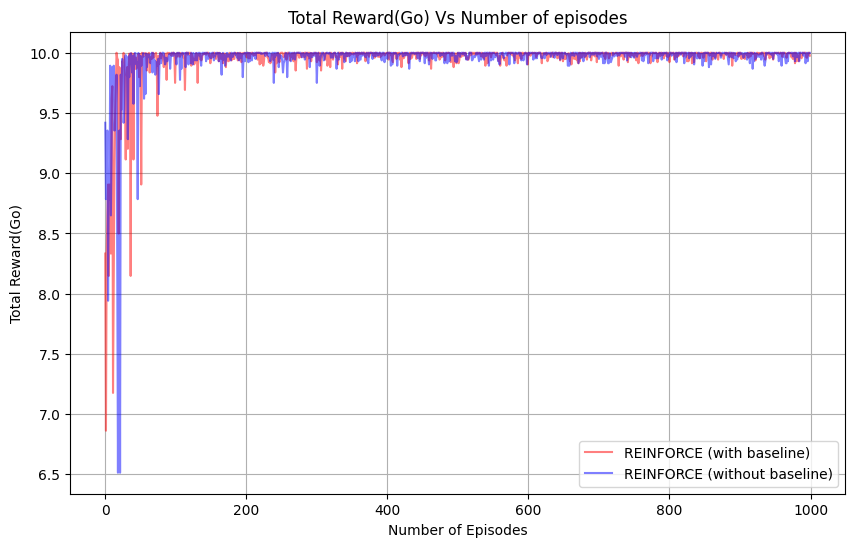

In [18]:
episodes=range(len(data))
plt.figure(figsize=(10, 6))
plt.plot(episodes, data, c='red', alpha=0.5, label='REINFORCE (with baseline)')
plt.plot(episodes, total_rewards, c='blue', alpha=0.5, label='REINFORCE (without baseline)')
plt.xlabel('Number of Episodes')
plt.ylabel('Total Reward(Go)')
plt.title('Total Reward(Go) Vs Number of episodes')
plt.grid(True)
plt.legend()
plt.show()

# Ans6 
### It is observed from the graph as well as the data and total rewards that REINFORCE with baseline converges faster than REINFORCE without baseline.

In [19]:
# Closing the environment :)
env.close()